# <font color='darkblue'>ASTR 21100 

## <font color='darkblue'>"Computational Techniques in Astrophysics"
    
    
## <font color='darkblue'>Approximation methods for multi-dimensional functions


### <font color='darkblue'>Instructor: Andrey Kravtsov

In [5]:
import numpy as np 
from timeit import default_timer

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_color_map
plot_prettier()

### <font color='darkblue'>Multi-dimensional (aka multivariate) functions

That is interpolation of a function in more than variable: $f(x, y,\ldots)$. 

For example, distance to far away galaxies or quasars that we considered previously depends on redshift $z$, Hubble constant $H_0$, and dimensionless density of matter and vacuum energy: $d_L(z, H_0, \Omega_{\rm m0},\Omega_\Lambda)$. This is an example of 4-dimensional function.  

In what follows, a function of many parameters will be denoted as $f(\mathbf{x})$, where vector $\mathbf{x}=x_0,x_1,\ldots,x_N$. Note that in general function itself can produce multiple values for a given $\mathbf{x}$ (i.e., $f$ in general can be a vector). 

In [6]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_l_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

### <font color='darkblue'> $d_L(\Omega_{\rm m0},\Omega_\Lambda)$ as a 2-D function 
    
    
Let's look at how $d_L$ depends on $\Omega_{\rm m0}$ and $\Omega_\Lambda$. For this, we will "tabulate" the function on a 2D grid of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ values. 

In [7]:
nom0 = 100; noml = 100 # construct grids of Om0 and OmL values
om0min, om0max = 0., 1
om0 = np.linspace(om0min, om0max, noml)
omlmin, omlmax = 0., 1
oml = np.linspace(omlmin, omlmax, noml)

dlgrid = np.zeros((nom0, noml)) # initialize 2D numpy array for 2D grid of d_L values 
z = 1.0 # we will compute the grid at this redshift using fixed value of H0=70

# Now cycle through Om0 and OmL values, compute d_L and fill the dlgrid array with values
tstart = default_timer()
for i, omd in enumerate(om0):
    for j, omld in enumerate(oml):
            dlgrid[i,j] = d_l_astropy(z, 70., omd, omld)
            
print("execution time = %.8g sec"%(default_timer()-tstart))


execution time = 5.6185439 sec


Now we plot $d_L$ as a colormap using <tt>plot_color_map</tt> function in <tt>codes/plotting.py</tt> file 

To learn more about different ways to make color maps in Matplotlib and how to add colorbar to the plot, see <a href="https://matplotlib.org/2.0.1/examples/pylab_examples/pcolor_demo.html">here</a>. 

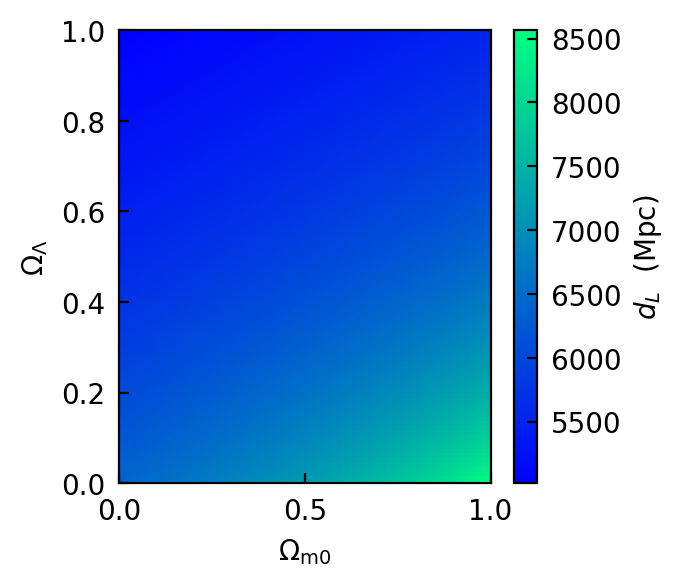

In [9]:
plot_color_map(om0, oml, dlgrid, xlim=[0.0,1.001], ylim=[0.,1.0], 
               xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$\Omega_\Lambda$', 
               figsize=3.0, cbar_label=r'$d_L\ \rm\ (Mpc)$', colorbar=True)

Another way to plot 2D functions is in 3D, as a surface. In this case $x$, $y$ axes represent the function variables, while the 3rd $z$ axis represent function values $f(x,y)$. 

Matplotlib 3D capabilities are illustrated in the function below. 

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def plot_func_3d(x, y, z, xlabel=None, ylabel=None, zlabel=None, 
                 figsize=5., cmap=cm.coolwarm):

    fig = plt.figure(figsize=(figsize,figsize))
    ax = fig.add_subplot(111, projection='3d')

    if xlabel is not None: ax.set_xlabel(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)
    if zlabel is not None: ax.set_zlabel(zlabel)

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cmap,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(z.min(), z.max())
    plt.show()


You can make the plot below interactive by uncommenting the second "magic" command below (%matplotlib notebook). 

After you plot it in the notebook regime, you will be able to resize the plot and rotate it. 

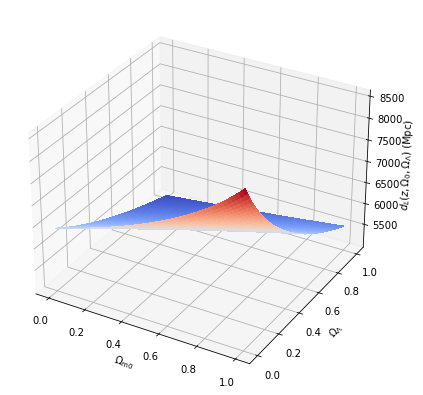

In [11]:
%matplotlib inline
#%matplotlib notebook

# construct 2D arrays X, Y required by Matplotlib's plot_surface 
om0g, omlg = np.meshgrid(om0, oml)

plot_func_3d(om0g, omlg, dlgrid, figsize=7, xlabel=r'$\Omega_{\rm m0}$', 
             ylabel=r'$\Omega_\Lambda$', zlabel=r'$d_L(z,\Omega_0,\Omega_\Lambda)\rm\ (Mpc)$')

$\rightarrow$ Dependence of $d_L$ on $\Omega_{\rm m0}$ and $\Omega_\Lambda$ is *very smooth* and can be approximated by a slightly curved surface.

Given that polynomial approximation worked well for $d_L$ as a function of a $\Omega_{\rm m0}$, it can be expected that the surface can be approximated by a 2-dimensional polynomial. 

### <font color='darkblue'><a href="https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html">Numpy meshgrid</a> function

Given two 1D vectors <tt>x1</tt> and <tt>y1</tt>, it generates two 2D arrays <tt>x2</tt> and <tt>y2</tt> that contain $x$ and $y$ coordinates for all cells of a 2D grid scanning all values of <tt>x1</tt> and <tt>y1</tt>. 
    
These 2D arrays are generated for a convenient vector evaluation of 2D functions $z=f(x, y)$ on a grid of $x$ and $y$ values.

In [12]:
xmin, xmax, nx = 1, 30, 59
ymin, ymax, ny = 1, 60, 119
x1, y1 = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x2, y2 = np.meshgrid(x1, y1)
print(np.shape(x2), np.shape(y2))
print(x2)
print(y2)

(119, 59) (119, 59)
[[ 1.   1.5  2.  ... 29.  29.5 30. ]
 [ 1.   1.5  2.  ... 29.  29.5 30. ]
 [ 1.   1.5  2.  ... 29.  29.5 30. ]
 ...
 [ 1.   1.5  2.  ... 29.  29.5 30. ]
 [ 1.   1.5  2.  ... 29.  29.5 30. ]
 [ 1.   1.5  2.  ... 29.  29.5 30. ]]
[[ 1.   1.   1.  ...  1.   1.   1. ]
 [ 1.5  1.5  1.5 ...  1.5  1.5  1.5]
 [ 2.   2.   2.  ...  2.   2.   2. ]
 ...
 [59.  59.  59.  ... 59.  59.  59. ]
 [59.5 59.5 59.5 ... 59.5 59.5 59.5]
 [60.  60.  60.  ... 60.  60.  60. ]]


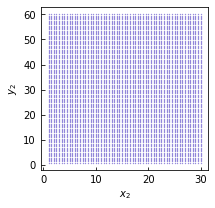

In [13]:
# illustration of x and y generated my meshgrid
plt.figure(figsize=(3,3))
plt.xlabel('$x_2$'); plt.ylabel('$y_2$')
plt.scatter(x2, y2, marker='o', s=0.1, c='slateblue')
plt.show()

You can read more about meshgrid function and its uses <a href="https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy">in this stackoverflow thread</a>. 

### <font color='darkblue'>A related function: <a href="https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html">numpy.mgrid</a> object

Output of mgrid is equivalent to the output of np.meshgrid when input vectors are integer evenly spaced values: 

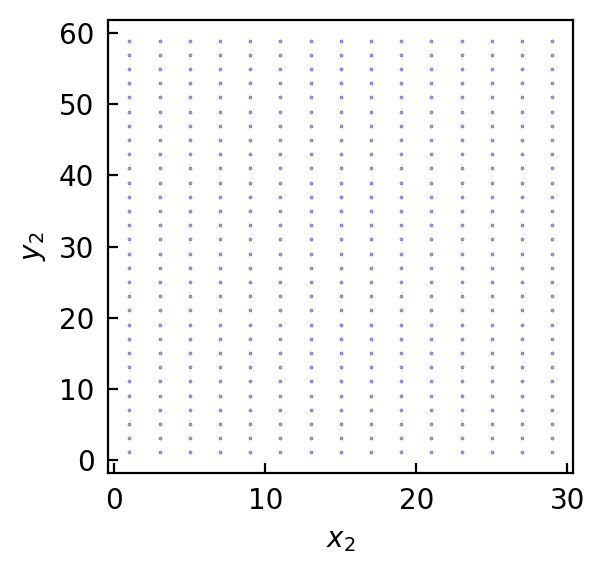

In [14]:
x2, y2 = np.mgrid[1:30:2,1:60:2]

plot_prettier()
plt.figure(figsize=(3,3))
plt.xlabel('$x_2$'); plt.ylabel('$y_2$')
plt.scatter(x2, y2, marker='o', s=0.1, c='slateblue')
plt.show()

### <font color='darkblue'>2D polynomial interpolation

Two-dimensional polynomial of order $m$ in the standard notation is given by:

$$p_m(x,y) = \sum\limits_{i=0}\sum\limits_{j=0}^{j+i\leq m} a_{ij}x^i y^j.$$

For example, quadratic 2D polynomial is 

$$p_2(x,y) = a_{00} + a_{01}y + a_{02}y^2 + a_{10}x + a_{20}x^2 + a_{11}xy$$

The same approach as for 1D polynomials, we need to have function values at $\geq 2(m+1)$ training points to solve for $2(m+1)$  $a_{ij}$ coefficients.

In [15]:
# an example 2D polynomial using x2 and y2 grids defined above

z2 = x2**2 + 2*x2*y2 + y2**2

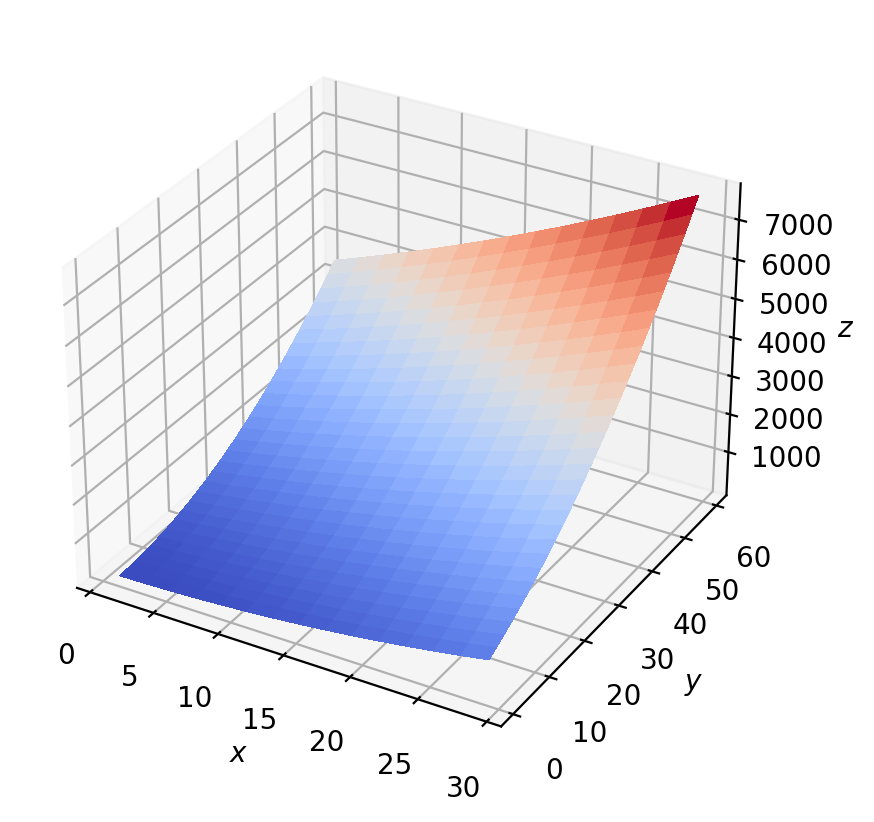

In [16]:
plot_func_3d(x2, y2, z2, xlabel='$x$', ylabel='$y$', zlabel='$z$')


### <font color='darkblue'>2D polynomial regression

By far the most common situation is that we have $N\gg m$ training points.
    
In this case the problem is *overdetermined* and we construct approximation using least squares regression, similarly to how regression is done in 1d (see notebook 05_approximation_class). Least squares condition defines a system of $m$ equations for $m$ coefficients, which is solved by methods of linear algebra. 
    
In the function below this system is solved using Singular Value Decomposition (SVD) methods implemented in <tt>np.linalg.lstsq</tt>. 

In [17]:
def polyfit2d(xtr, ytr, ftr, order=None):
    '''
    Parameters:
        xtr, ytr - 1d numpy vectors with training points of x and y
        ftr - function values at xtr, ytr values
        order - int, order of the polynomial
        
    Returns:
        coefficients of the 2D polynomial
    '''
    # generate 2d coordinates on a rectangular grid
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((order+1, order+1))
    # array that will contain polynomial term values 
    s = np.zeros((coeffs.size, x.size))

    # construct the 2D matrix of values for each polynomial term i, j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        s[index] = arr.flatten() 
        
    # solve for the polynomial coefficients using least squares approximation of ftr values 
    return np.linalg.lstsq(s.T, np.ravel(ftr), rcond=None)[0]

def poly2d(xtest, ytest, a):
    '''
    Compute values of the 2D polynomial given the coefficients in 1d array a 
    at points given by 2d arrays xtest and ytest (generated using meshgrid)
    '''
    order1 = np.rint(a.size**0.5).astype(int)
    return np.polynomial.polynomial.polyval2d(xtest, ytest, a.reshape((order1,order1)))
    

In [18]:
# be careful with polynomial order, results quickly become unstable as order increases
order = 5

xmin, xmax, nx = 1, 30, 59
ymin, ymax, ny = 1, 60, 119
x1, y1 = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x2, y2 = np.meshgrid(x1, y1)
z2 = x2**2 + 2*x2*y2 + y2**2

# get coefficients of best 2d polynomial
a = polyfit2d(x1, y1, z2, order=order)
zpoly = poly2d(x2, y2, a)

# set up test/validation points
nt = 200
xt, yt = np.linspace(xmin, xmax, nt), np.linspace(ymin, ymax, nt)
xgt, ygt = np.meshgrid(xt, yt)

# compute polynomial values on the grid of test points
ztpoly = poly2d(xgt, ygt, a)
ztexact = xgt**2 + 2*xgt*ygt + ygt**2 # compute exact values at the test points

Now let's plot polynomial approximation at test points as a 2D color map.

ferr_min = -9.1608e-05,  ferr_max = 1.9873e-05


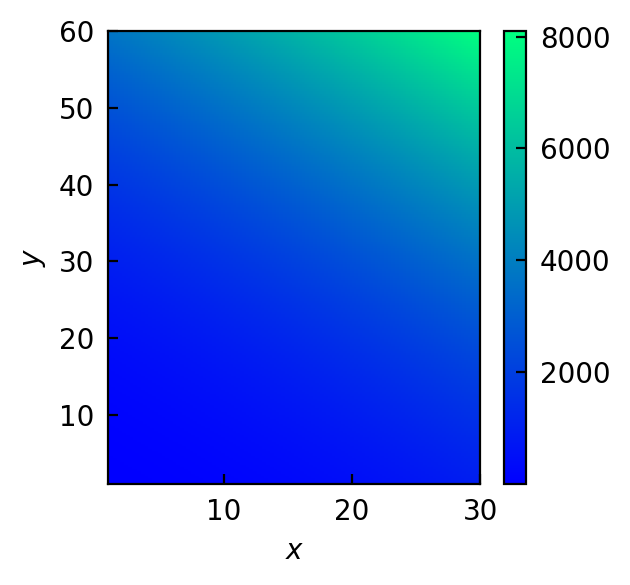

In [19]:
# print min and max fractional error
ferr_min, ferr_max = (ztpoly/ztexact-1).min(), (ztpoly/ztexact-1).max()
print(f'ferr_min = {ferr_min:.4e},  ferr_max = {ferr_max:.4e}')

# plot approximating polynomial
plot_color_map(xgt, ygt, ztpoly, xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   figsize=3.0)

### <font color='blue'>A more realistic example: modelling background variation in an image</font>

This example is a variation of the example <a href="https://stak-notebooks.readthedocs.io/en/latest/images.imfit.html#imsurfit">here</a>. 

The code below generates a mock noisy pixel field with a gradient. This is quite similar to background pixels in real astro images where background is often non-uniform and has such gradients. We usually want to take out such gradient to make background uniform (or ``flat''). 

In [20]:
# Generate mock background data
np.random.seed(0)
y, x = np.mgrid[:128, :128]
z = 2. * x**2 - 0.5 * y**2 + 1.5 * x * y - 1.
z += np.random.normal(loc=0., scale=5000, size=z.shape)

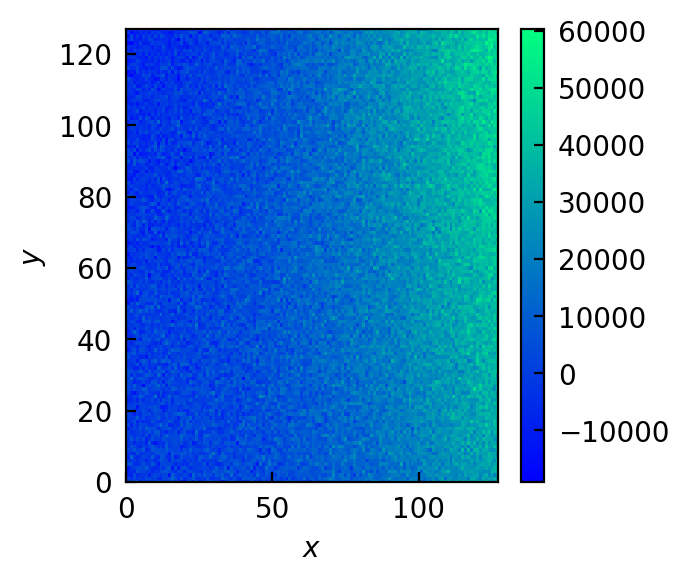

In [21]:
plot_color_map(x, y, z, xlim=[0,127], ylim=[0, 127], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   figsize=3.0)

First with <tt>polyfit2d</tt> function introduced above

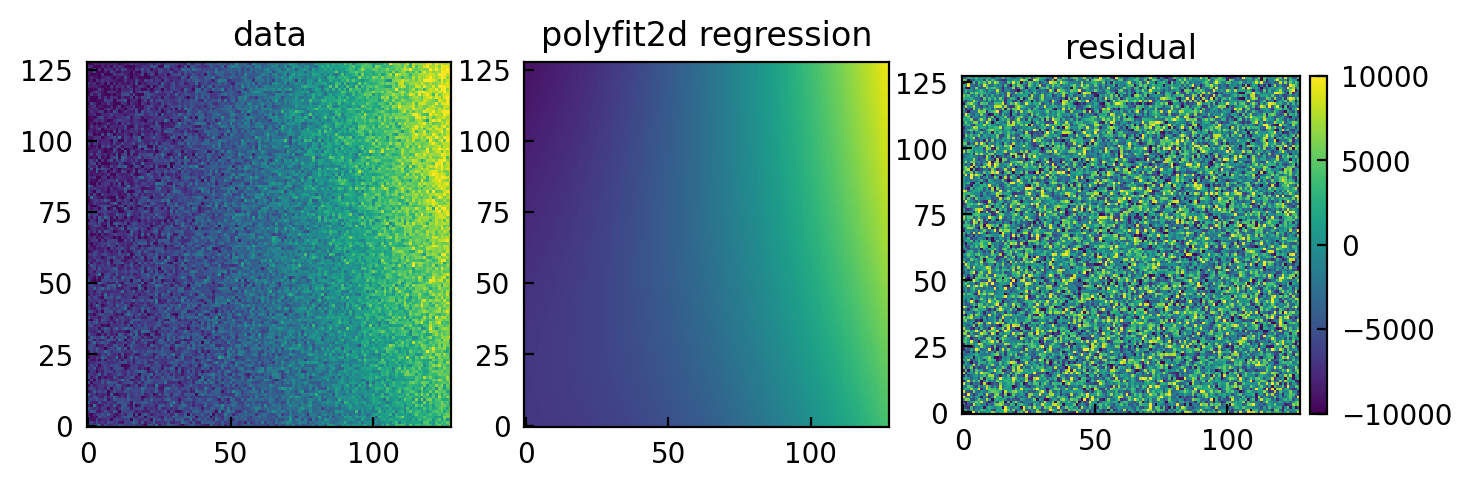

In [22]:
from codes.plotting import plot_data_fit2d

# now with polyfit2d function
order = 4
apc = polyfit2d(x[0], y[:,0], z, order=order)
my_poly = poly2d(x, y, apc).T

plot_data_fit2d(x, y, z, my_poly, model_name='polyfit2d regression')


It works reasonably well for 4th order polynomial, but fails for larger orders due to roundoff errors generated in <tt>np.linalg.lstsq</tt> used in polyfit2d. 

AstroPy package has functions for 2D polynomial regression that are more reliable and stable. Example below shows how to use them. 

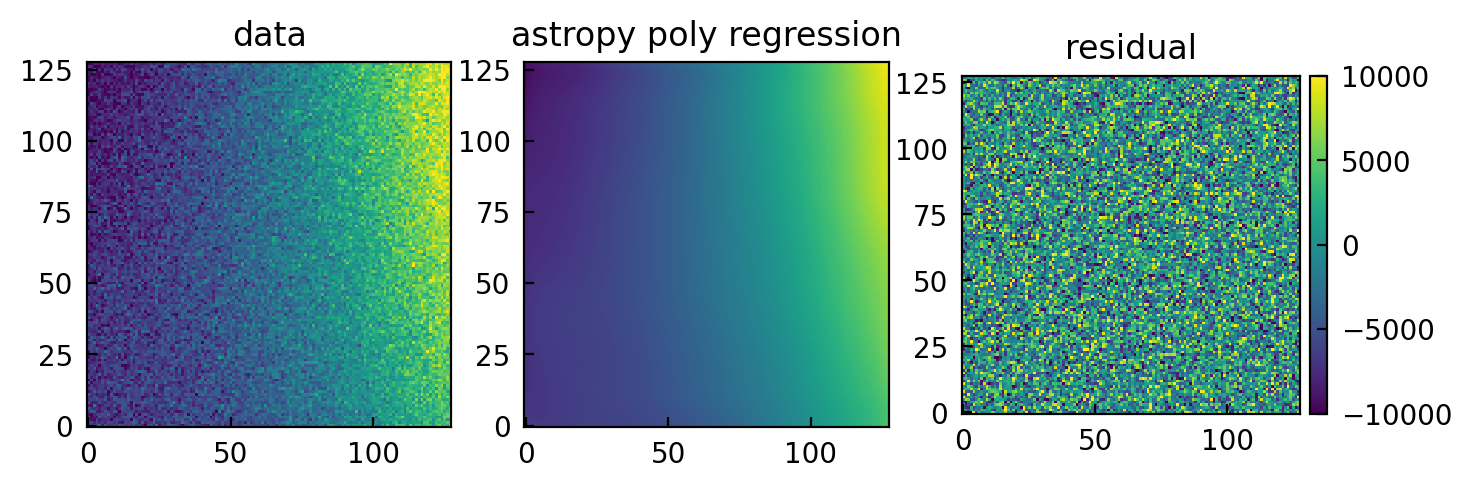

In [23]:
from astropy.modeling import models, fitting

# 2d polynomial regression of the data using astropy.modeling
p_init = models.Polynomial2D(degree=10)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, x, y, z)

plot_data_fit2d(x, y, z, p(x,y), model_name='astropy poly regression')


## <font color='blue'>Using polynomial regression to approximate $d_L(\Omega_{\rm m0},\Omega_\Lambda)$</font> 

The function below is a helper function to construct training and testing values of $d_L(\Omega_{\rm m0},\Omega_\Lambda)$ and its variables. 

In [24]:
def get_dl_train_test(ntrain=15, ntest=100, z=1.0, H0=70., om0min=0., om0max = 1., omlmin=0., omlmax=1.):

    # training points 
    om0tr = np.linspace(om0min, om0max, ntrain)
    omltr = np.linspace(omlmin, omlmax, ntrain)

    dl_train = np.zeros((ntrain, ntrain)) # initialize 2D numpy array for 2D grid of d_L values 
    # Now cycle through Om0 and OmL values, compute d_L and fill the dlgrid array with values
    for i, omd in enumerate(om0tr):
        for j, omld in enumerate(omltr):
                dl_train[i,j] = d_l_astropy(z, H0, omd, omld)

    # test points             
    om0t = np.linspace(om0min, om0max, ntest)
    omlt = np.linspace(omlmin, omlmax, ntest)

    dl_test = np.zeros((ntest, ntest)) # initialize 2D numpy array for 2D grid of d_L values 
    # Now cycle through Om0 and OmL values, compute d_L and fill the dlgrid array with values
    for i, omd in enumerate(om0t):
        for j, omld in enumerate(omlt):
                dl_test[i,j] = d_l_astropy(z, H0, omd, omld)

    return om0tr, omltr, om0t, omlt, dl_train, dl_test

Get training and test values of $d_L$ and use training data to construct approximation to $d_L(\Omega_{\rm m0},\Omega_\Lambda)$ using 2d polynomial regression. 

In [25]:
ntrain, ntest = 15, 100
om0tr, omltr, om0t, omlt, dl_train, dl_test = get_dl_train_test(ntrain=ntrain, ntest=ntest)

order = 5 # polynomial order 
# get coefficients
apc = polyfit2d(om0tr, omltr, dl_train, order=order)

# get grid of test values 
om0g, omlg = np.meshgrid(om0t, omlt)

my_poly = poly2d(om0g, omlg, apc).T

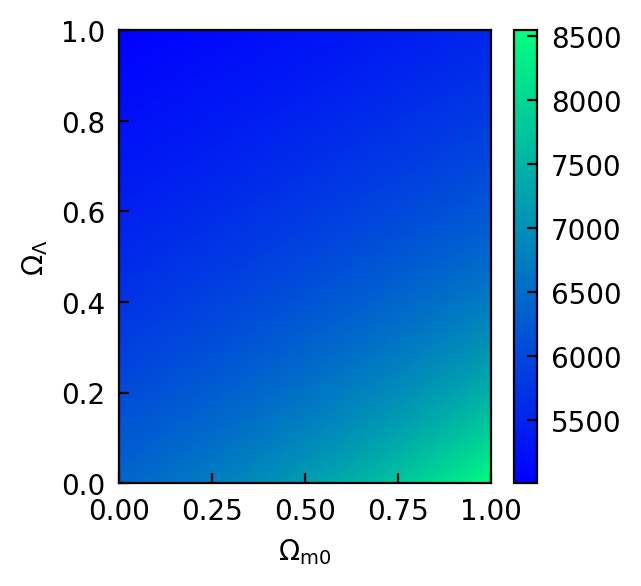

In [26]:
# plot approximating polynomial
ferr = my_poly/dl_test - 1.0
plot_color_map(om0t, om0t, my_poly, xlim=[0,1], ylim=[0,1], 
                   xlabel = r'$\Omega_{\rm m0}$', ylabel = r'$\Omega_\Lambda$', cmap='winter', colorbar=True, 
                   figsize=3.0)


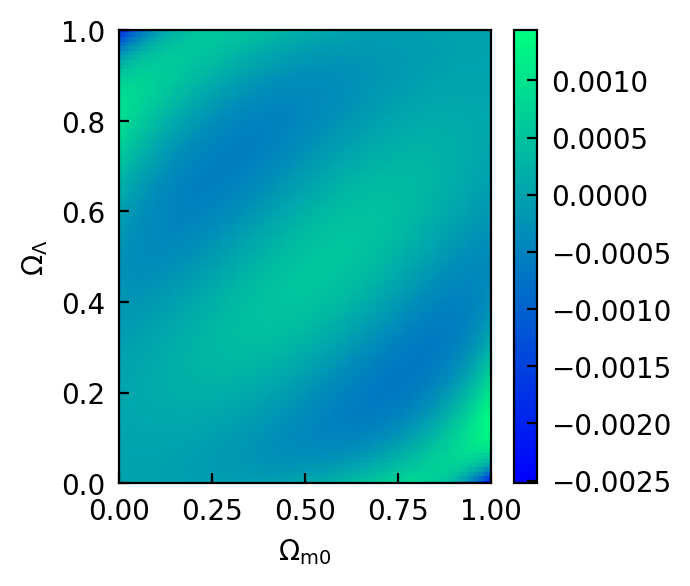

In [27]:
# plot fractional error
ferr = my_poly/dl_test - 1.0
plot_color_map(om0t, om0t, ferr, xlim=[0,1], ylim=[0,1], 
                   xlabel = r'$\Omega_{\rm m0}$', ylabel = r'$\Omega_\Lambda$', cmap='winter', colorbar=True, 
                   figsize=3.0)

We can see that we obtained an approximation with accuracy well below $1\%$.  

Let's see how fast we can compute $d_L$ for random million pairs of parameter values. As you can see - a fraction of a second. This would take us hours if we were evaluating integral itself every time.  

In [28]:
nrand = 1000000
omr = np.random.uniform(size=nrand)
omlr = np.random.uniform(size=nrand)

tstart = default_timer()
dlr = poly2d(omr, omlr, apc).T
print("execution time = %.8g sec"%(default_timer()-tstart))


execution time = 0.1747985 sec


## <font color='blue'>Multivariate spline interpolation</font> 

Like in 1D, multivariate splines are constructed using piecewise low-order polynomials with coefficients constrained to maintain continuity of the spline derivatives of up to some order. 
    
In 2D splines, 2D polynomials like those considered above are used. For larger number of dimensions the number of coefficients and complexity of linear algebra calculations that are used to compute them increases. So spline approximations are typically limited to low dimensions ($\leq 4$). In fact in Python packages, only 2D spline approximation functions exist. 

Let's take a look at the functions available for multi-dimensional interpolation in <a href="https://docs.scipy.org/doc/scipy/reference/interpolate.html">scipy.interpolate</a>

#### <font color='darkblue'>Spline interpolation in 2D

Several functions for spline interpolation, but only in 2D (some of the useful "high-level" routines): 

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d"><tt>scipy.interpolate.interp2d</tt></a> - 2d spline interpolation with an interface similar to <tt>interp1d</tt>. 


* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline"><tt>scipy.interpolate.RectBivariateSpline</tt></a> - for spline approximation of points evenly spaced on a rectangular grid with a possibility of choosing smoothing parameter <tt>s</tt>, similarly to <tt>UnivariateSpline</tt> for 1d spline approximation.

    
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.SmoothBivariateSpline.html#scipy.interpolate.SmoothBivariateSpline"><tt>scipy.interpolate.SmoothBivariateSpline</tt></a> - 2d spline for arbitrarily spaced points with a possibility of choosing smoothing parameter <tt>s</tt>, similarly to <tt>UnivariateSpline</tt> for 1d spline approximation.

    
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LSQBivariateSpline.html#scipy.interpolate.LSQBivariateSpline"><tt>scipy.interpolate.LSQBivariateSpline</tt></a> - least squares regression with splines in 2D. 


### <font color='darkblue'>A text example: a 2D sine function 

Like in 1D, multivariate splines are constructed using piecewise low-order polynomials with coefficients constrained to maintain continuity of the spline derivatives of up to some order. 

In [29]:
def sin2d(x, y):
    return 0.5*(np.sin(x) + np.sin(y))

In [30]:
# construct 2d interpolating cubic spline given training values xtr, ytr, and ftr 
from scipy.interpolate import RectBivariateSpline

x2, y2 = np.meshgrid(x1, y1)
zsin = sin2d(x2, y2)

# create an instance of a 2d spline interpolation object
# s = 0 forces interpolation instead of regression, kx, ky set order of spline polynomials (cubic here)
spl2d = RectBivariateSpline(x1, y1, zsin.T, s=0, kx=3, ky=3)

# compute spline approximation values at test points defined for polynomials above
zspl = spl2d(x1, y1).T

Plot the function itself.

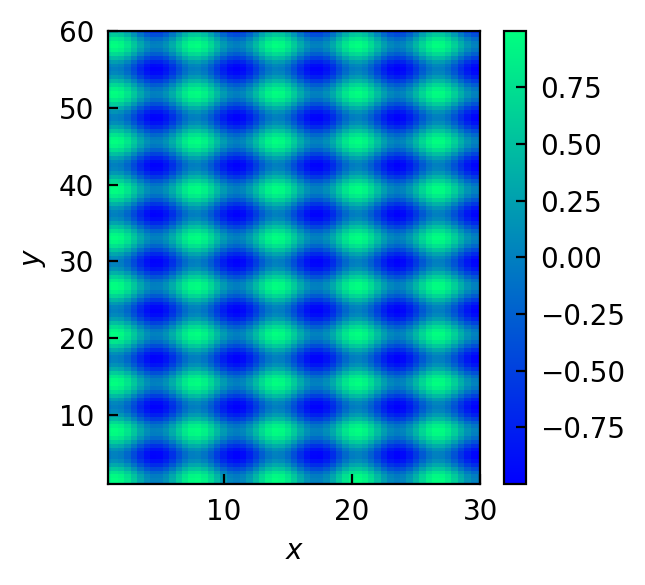

In [31]:
plot_color_map(x1, y1, sin2d(x2,y2), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   figsize=3.0)

Plot the spline approximation

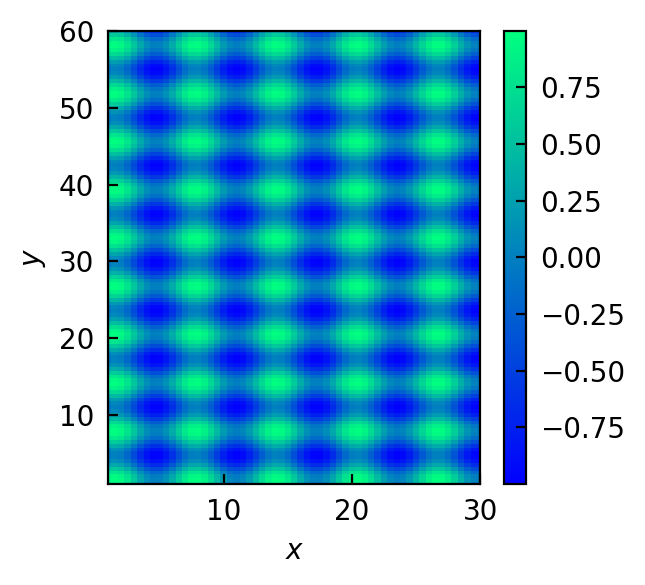

In [32]:
plot_color_map(x1, y1, zspl, xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   figsize=3.0)

Plot fractional error

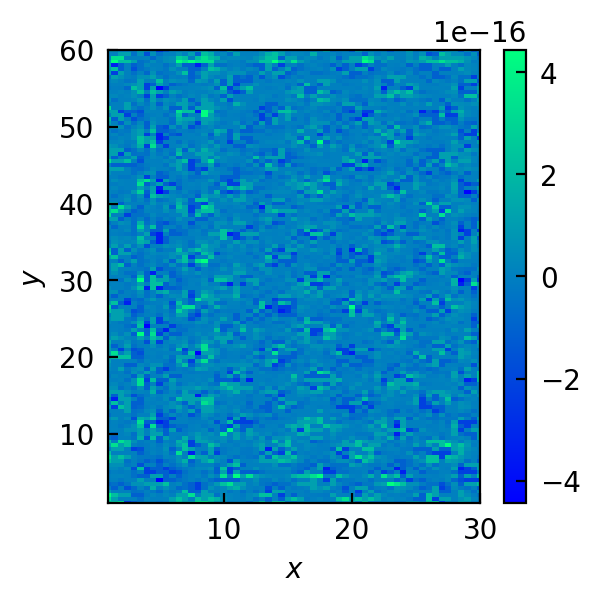

In [33]:
# plot approximation at test points as a color map

plot_color_map(x1, y1, zspl-sin2d(x2,y2), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   figsize=3.0)

## <font color='blue'>Using spline interpolation to approximate $d_L(\Omega_{\rm m0},\Omega_\Lambda)$</font> 



Get training and test values of $d_L$ and use training data to construct approximation to $d_L(\Omega_{\rm m0},\Omega_\Lambda)$ using 2d polynomial regression. 

In [34]:
from scipy.interpolate import RectBivariateSpline

ntrain, ntest = 15, 100
om0tr, omltr, om0t, omlt, dl_train, dl_test = get_dl_train_test(ntrain=ntrain, ntest=ntest)

# create an instance of a 2d spline interpolation object
spl2d = RectBivariateSpline(om0tr, omltr, dl_train, s=0, kx=3, ky=3)

# compute spline approximation values at test points defined for polynomials above
dspl = spl2d(om0t, omlt)

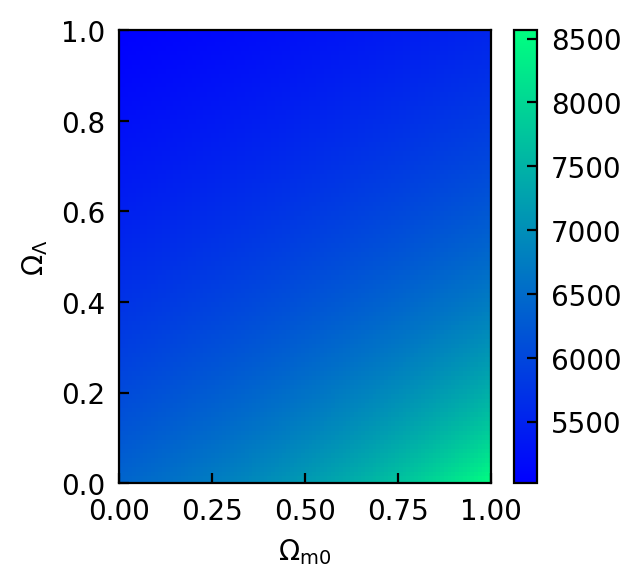

In [35]:
# plot approximating polynomial
ferr = dspl/dl_test - 1.0
plot_color_map(om0t, om0t, dspl, xlim=[0,1], ylim=[0,1], 
                   xlabel = r'$\Omega_{\rm m0}$', ylabel = r'$\Omega_\Lambda$', cmap='winter', colorbar=True, 
                   figsize=3.0)


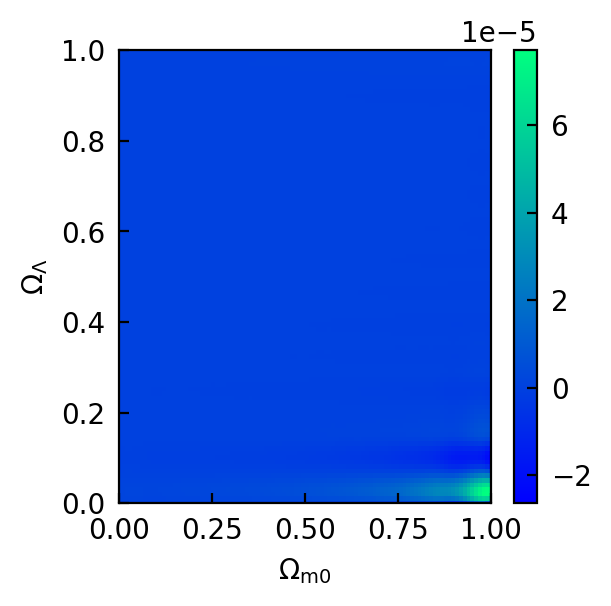

In [36]:
# plot fractional error
ferr = dspl/dl_test - 1.0
plot_color_map(om0t, om0t, ferr, xlim=[0,1], ylim=[0,1], 
                   xlabel = r'$\Omega_{\rm m0}$', ylabel = r'$\Omega_\Lambda$', cmap='winter', colorbar=True, 
                   figsize=3.0)

We can see that spline approximation is quite accurate.  

In [37]:
nrand = 1000000
omr = np.random.uniform(size=nrand)
omlr = np.random.uniform(size=nrand)

tstart = default_timer()
dlr = spl2d(omr, omlr, grid=False)
print("execution time = %.8g sec"%(default_timer()-tstart))


execution time = 0.1146112 sec


A bit slower than evaluating using polynomial approximation, but still very fast. 

### <font color='darkblue'>Piecewise linear interpolation in many dimensions

Scipy functions
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata"><tt>griddata</tt>,  <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator"><tt>LinearNDInterpolator</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interpn.html#scipy.interpolate.interpn"><tt>interpn</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html#scipy.interpolate.RegularGridInterpolator"><tt>RegularGridInterpolator</tt></a>.

### <font color='darkblue'>2D linear interpolation from the function values at evenly spaced grid of points
    
Suppose we have a grid of evenly spaced points covering a rectangular 2-dimensional $x-y$ domain, $x_i$ and $y_i$ where $i,j=0,\ldots, N-1$,  and function values tabulated at the grid nodes: $f_{ij} = f(x_i, x_j)$. 

A piecewise linear interpolation from the function values at grid points to a given point $(x,y)$ uses a 2D linear polynomial to approximate the function within the vicinity of that point:

$$f(x,y)\approx p_{1}(x,y) = a_{00} + a_{10}x + a_{01}y + a_{11} xy.$$


To find the 4 coefficients $a_{00}$, $a_{10}$, $a_{01}$, $a_{11}$ of the local approximating polynomial, we need 4 function values: these are taken to be the function values at the grid points closest to the point $(x,y)$. We can think of the grid of points as forming a grid of rectangular cells with side length equal to the spacing of grid points in each axis, with each grid point located in the center of each of such "cells". 

<center>
<img width=500 src="https://astro.uchicago.edu/~andrey/classes/a211/img/cic_schema.png"></img>

Rescale coordinates as follows $x\rightarrow \tilde{x}=(x-x_i)/h_x$, $\tilde{y}\rightarrow y=(y-y_j)/h_y$. The rescaled $\tilde{x}$ and $\tilde{y}$ now lie in $[0,1]$. 

A piecewise 2D linear interpolation polynomial to approximate the function around $(x,y)$ then is (see 11_approximation_multid notebook): 

$$p_1(x,y) = (1 -\tilde{x})(1-\tilde{y})\,f_{i,j} + (1-\tilde{y})\tilde{x}\,f_{i+1,j} + (1-\tilde{x})\tilde{y}\,f_{i,j+1} + \tilde{x}\tilde{y}\,f_{i+1,j+1}.$$ 

$$= w_{i,j}\,f_{i,j} + w_{i+1,j}\,f_{i+1,j} + w_{i,j+1}\,f_{i,j+1} + w_{i+1,j+1}\,f_{i+1,j+1}.$$ 


#### <font color='darkblue'>Geometric interpretation

Training functions from surrounding grid cells are averaged with weights given by the corresponding shaded areas:
<center>
<img width=500 src="https://astro.uchicago.edu/~andrey/classes/a211/img/cic_schema.png"></img>

Such interpolation is used in simulations of $N$-body systems in the <a href="https://en.wikipedia.org/wiki/Particle_Mesh">Particle Mesh</a> (PM) codes and Particle-in-Cell (PIC) codes for simulations of particle dynamics in plasma. 

A related approach is to interpolate mass or charge of particles onto neighboring grid cells in such codes is called Cloud-in-Cell (CIC) method. The most commonly used interpolation here is also linear. 

### <font color='darkblue'>Linear interpolation from randomly spaced points onto evenly spaced grid points

If we face the opposite task of interpolating from randomly spaced training points to the points on evenly spaced grid, we can reuse the above result and carry out linear interpolation by assigning each of the nearest grid points the value of the function at the random point with the corresponding weight:

Each random points adds a contribution to each of the 4 nearest cells as follows
\begin{eqnarray}
f_{i,j} & = & f_{i,j} &+& f(x, y)\, w_{i,j}; \\ 
f_{i+1,j}  &=&  f_{i+1,j} &+& f(x, y)\, w_{i+1,j};\nonumber \\
f_{i,j+1} & = & f_{i,j+1} &+& f(x, y)\, w_{i,j+1};\\
f_{i+1,j+1} & =&  f_{i+1,j+1} &+& f(x, y)\, w_{i+1,j+1};\nonumber \\
\end{eqnarray}

### <font color='darkblue'>An illustration: linear interpolation reconstruction of the Cosmic Ray-corrupted image 

Calculations below show that linear interpolation, despite its relative simplicity, can tackle this problem pretty well and is much faster than RBF. 

Consider an image in which useful information in some random fraction of pixels is lost for some reason (in real observations this can happen when a charged particle, called cosmic ray, hits a pixel). We want to use good pixels to reconstruct the values in the damaged pixels. 

This is a toy example, but nevertheless is quite realistic. Real astronomical images are taken using CCDs (similar to devices used in digital cameras, such as in your phone, but larger and more sensitive and less noisy). Cosmic rays - charged particles that stream about constantly, can hit a pixel in a CCD and destroy any useful information accumulated in it. If exposed for a long time to a high flux of cosmic rays, CCD image will have many bad pixels. 

Cosmic rays hit pixels in image randomly, so their effect can be approximated by making a random subset of pixels unusable ("black"). 
We can attempt to use good pixels to repair (or reconstruct) values in the pixels affected by the cosmic rays. Namely, the photon counts in good pixels are used as training data to construct approximation of 2d function (image). The approximation can then be used to assign values of the approximation to all of the bad pixels. 

In the code below <a href="https://scikit-image.org/">scikit-image</a> package is used, which will also be used later in the course. So please install it, if it's not installed in the Python distribution you use (see <a href="https://scikit-image.org/docs/stable/install.html">here</a> for installation instructions). 

In [38]:
from codes.plotting import show_image


In [39]:
from skimage import io

# read in RGB image of M101 - "the Pinwheel galaxy"
image = io.imread('https://astro.uchicago.edu/~andrey/classes/a211/img/m101_nasa.jpg')
# image size
nxp, nyp = image.shape[0], image.shape[1]
print("image size %d x %d pixels; pixel data type is %s"%(nxp, nyp, image.dtype))

image size 270 x 400 pixels; pixel data type is uint8


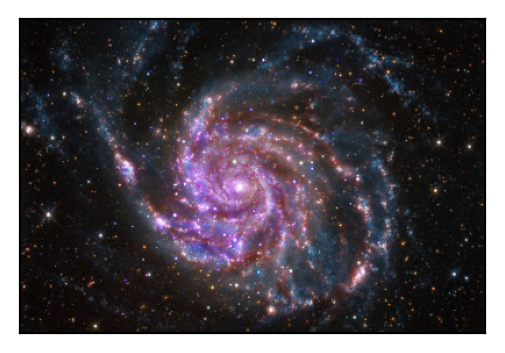

In [40]:
show_image(image, figsize=3)

In [41]:
# make a copy of one of the channels for experimentation
image_cr = np.copy(image[:,:,2])

# clip pixel values to the range of [0-254]
image_cr = np.clip(image_cr, 0, 254)

In [42]:
# corrupting a fraction of pixels fcr by "cosmic rays"
fcr = 0.9 # extreme example of 90% of pixels corrupted by cosmic rays
xr = np.random.uniform(size=np.shape(image_cr))

cr_pixels = (xr <= fcr) # get filter array with True values for pixels affected by cosmic rays
image_cr[cr_pixels] = 255 # mark CR-hit pixels as black 

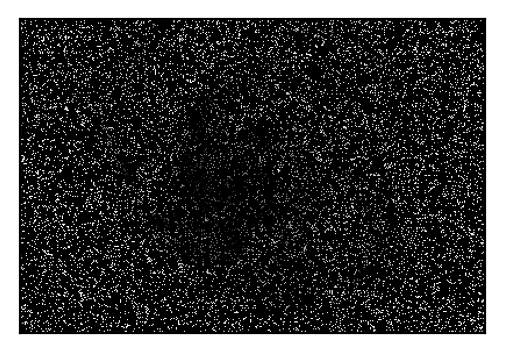

In [43]:
show_image(image_cr, figsize=3)

We can see that the image does not ressemble the original. It looks hopelessly lost. 



In [44]:
# find indices of good pixels
inds_good = np.argwhere(image_cr <= 254)
# find indices of bad pixels affected by cosmic rays
inds_cr = np.argwhere(image_cr == 255)

In [45]:
# we will use good pixels as the training sample for RBF interpolation
train_vals = image_cr[inds_good[:,0],inds_good[:,1]]
# training pixel indices
xtrain, ytrain = inds_good[:,0], inds_good[:,1]

In [46]:
from scipy.interpolate import griddata

tstart = default_timer()

indsall = np.argwhere(image_cr>=0) # we will interpolate to all pixels
dummy = griddata(inds_good, train_vals, indsall, method='linear')

print("Piecewise linear interpolation took %.2f sec to complete"%(default_timer()-tstart))

Piecewise linear interpolation took 0.13 sec to complete


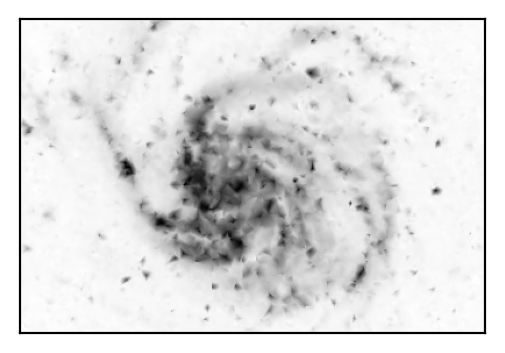

In [47]:
show_image(dummy.reshape(nxp,nyp), figsize=3)

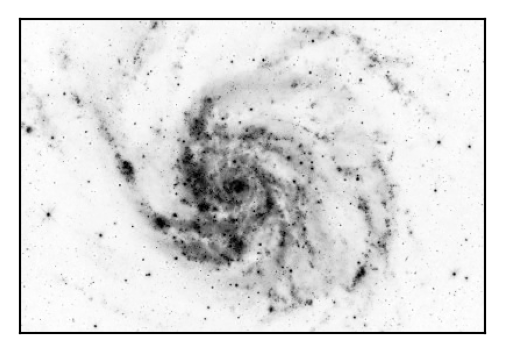

In [48]:
# original image
show_image(image[:,:,2], figsize=3);

This function also allows cubic spline interpolation, but in this case the result is not much improved compared to the simple linear interpolation. 

Piecewise cubic interpolation took 0.22 sec to complete


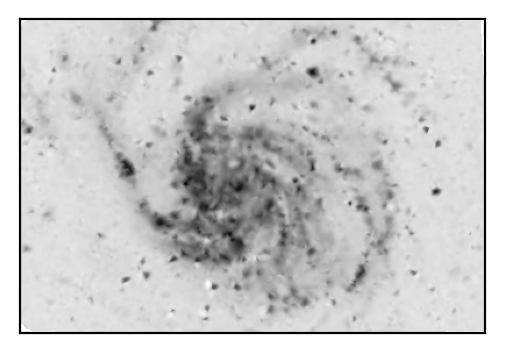

In [49]:
tstart = default_timer()
dummy = griddata(inds_good, train_vals, indsall, method='cubic')
print("Piecewise cubic interpolation took %.2f sec to complete"%(default_timer()-tstart))

show_image(dummy.reshape(nxp,nyp), figsize=3)

### <font color='blue'>2d function approximation summary</font>

* Accurate methods developed for approximation of 1D functions work in 2D
    
    
* The number of coefficients and the cost of calculations increases as the square of the polynomial order or number of training points. 
    
    
* Polynomial approximation becomes numerically unstable (overflows/underflows) for larger order. 
    

* These factors make application of standard methods in >2D dimensions difficult generally, but such approximations are used for specific problems sometimes, especially with Chebyshev nodes. 
    

* Piecewise linear and spline approximations are numerically stable and robust methods for 2D approximation. 
    
    
* Some accurate methods for approximation of functions in >2D do exist (e.g., RBF), but tend to be computationally expensive. 
    

* Majority of applications of function approximation in >2D involve Machine Learning methods, which are often crude and approximate, but do scale well with increasing $D$. 

## <font color='blue'>The rest of the notebook is for graduate students (optional for undegraduate students)</font>

### <font color='blue'>Interpolation in more than two dimensions?</font>

For larger number of dimensions  arrays and the number of computations becomes larger, matrices can become poorly conditioned sooner (e.g., it’s difficult to go beyond 8-10 order polynomial interpolation in 2D). 

This limits useful methods to simpler ones, such as the RBF or piecewise constant or piecewise linear interpolation that are discussed below. 

### <font color='blue'>Radial Basis Function (RBF) interpolation</font>

Implemented in <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html#scipy.interpolate.Rbf"><tt>scipy.interpolate.Rbf</tt></a>


In one dimension RBF approximation is expansion in the *radial basis function* set: 
$$f(x)\approx \sum\limits_{k=0}^{m} a_k\psi_k(x) $$ 

where function $\psi_k(x)=\phi(\vert x-x_k\vert)$ and $\phi$ is the same function for all $k$, which depends on the distance (or radius) of point $x$ from point $x_k$ specific to the function $\psi_k$: $\vert x-x_k\vert$.

If we have $N=m+1$ training points $x_i$ with corresponding function values $f_i = f(x_i)$, we can solve the linear system of $m+1$ equations

\begin{eqnarray}
f_0 &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_0-x_k\vert)\\
f_1 &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_1-x_k\vert)\\
\dots &\ldots& \ldots\\
f_m &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_m-x_k\vert)
\end{eqnarray}

for $m+1$ $a_k$ values that match these training $f_i$ values to machine precision, if the roundoff errors can be under control (which usually limits $m$ to small values).

In $D>1$ dimensions, we can write a similar expression, except $x$'s are replaced by $D$-dimensional vectors, $\mathbf{x}$ and distance is replaced by the $D$-dimensional distance $r_k=\|\mathbf{x}-\mathbf{x}_k\|$:

$$f(\mathbf{x})=\sum\limits_{k=0}^{m} a_k\phi(r_k).$$ 


| Number of dimensions |     Expression for distance  |
|----------------|-------------------------------|
| $D=1$    |  $$r_k = \vert x-x_k\vert$$ |
| $D=2$    |  $$r_k=[(x-x_k)^2+(y-y_k)^2]^{1/2}$$ |
| $D=3$    |  $$r_k=[(x-x_k)^2+(y-y_k)^2+(z-z_k)^2]^{1/2}$$|

### <font color='darkblue'>Commonly used radial basis functions

|RBF Name                  |Function                                         |  Comment        |
|-----------------------|-------------------------------------------------|--------------------------|
|Multiquadric         |     $$\phi(r)=[1+(r/\epsilon)^2]^{1/2}$$    | Most common     |
|Inverse multiquadric | $$\phi(r)=[1+(r/\epsilon)^2]^{-1/2}$$ | Performs better than quadratic for some functions |
|Gaussian               | $$\phi(r) = \exp\left[-\frac{1}{2}\left(\frac{r}{\epsilon}\right)^2\right]$$ | Goes to zero quickly, sometimes possible to get high-resolution and good results. |
| Polyharmonic splines | $$\phi(r) = r^{2k-1}$$| where  $k>0$  is integer  |



### <font color='darkblue'>A visual example: reconstruction of an image corrupted by cosmic rays

Let's see how RBF does on the cosmic-ray correction in image. 

In [50]:
# we will use good pixels as the training sample for RBF interpolation
train_vals = image_cr[inds_good[:,0],inds_good[:,1]]
# training pixel indices
xtrain, ytrain = inds_good[:,0], inds_good[:,1]

In [51]:
# RBF interpolation
from scipy.interpolate import Rbf

tstart = default_timer()
# initialize RBF interpolation object
rbf = Rbf(xtrain, ytrain, train_vals,  function='inverse')

print("RBF initialization took %.1f sec to complete"%(default_timer()-tstart))

RBF initialization took 14.4 sec to complete


The calculation in the next cell will take a couple of minutes to complete... 

In [52]:
# interpolate using RBF
image_cr_fixed = np.copy(image_cr)

tstart = default_timer()
# RBF interpolate values for CR-corrupted pixels 
image_cr_fixed[inds_cr[:,0], inds_cr[:,1]] = rbf(inds_cr[:,0], inds_cr[:,1])

print("RBF interpolation took %.1f sec to complete"%(default_timer()-tstart))

RBF interpolation took 122.1 sec to complete


Reconstructed image:

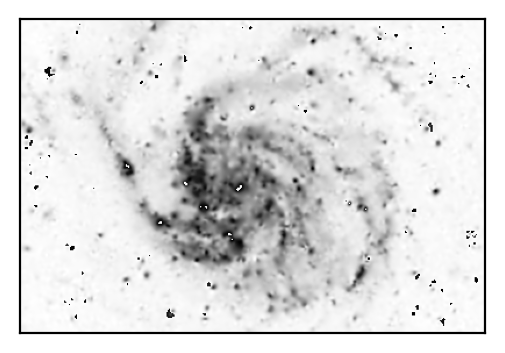

In [53]:
show_image(image_cr_fixed, figsize=3)

Looks almost like the original image: 

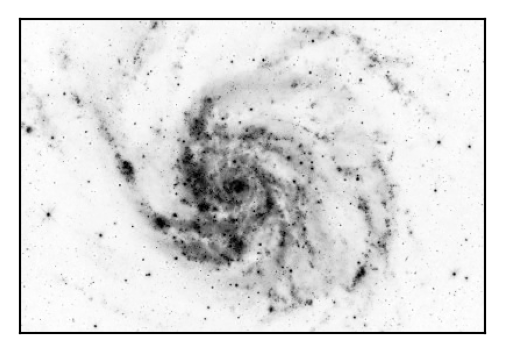

In [54]:
# original image
show_image(image[:,:,2], figsize=3);

Although some details are lost and reconstructed image looks smoother than the original one, it is fair to say that we got most of the visual information about this galaxy back. 

### <font color='darkblue'>This is amazing, but there are caveats:
    
#### <font color='darkblue'>RBF interpolation is expensive 

It takes $O(N^3_{\rm train})$ operations to compute coefficients for $N_{\rm train}$ training points and then $O(N_{\rm test})$ operations to compute approximate function at the test points. 
    
You can notice either by running above cells or by looking at the timing results, that it took ~5 minutes on my laptop to construct the RBF approximation, even though this image has only 270 x 400 pixels. 

RBF constructs approximation that can be evaluated at any $x$. 

However, in practice one often faces a more limited need to interpolate values from non-evenly distributed points to points on an evenly spaced grid. 

For example, in the CR-corrupted image above the distribution of "good" pixels is random, but we want to reconstruct image on a regular pixel grid. This problem is simpler and is handled either by the local (piecewise) linear or low-polynomial order interpolation discussed above. 